In [98]:
from nltk_utils import Helper
import random
from gensim import models
import json
import pickle
import numpy as np
import tensorflow as tf
from string import punctuation
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import os
# tf.config.set_visible_devices([], 'GPU')

In [99]:

df = pd.read_csv('./assets/data.csv')
# df.head()

slang_df = pd.read_csv('./assets/slangs.csv')


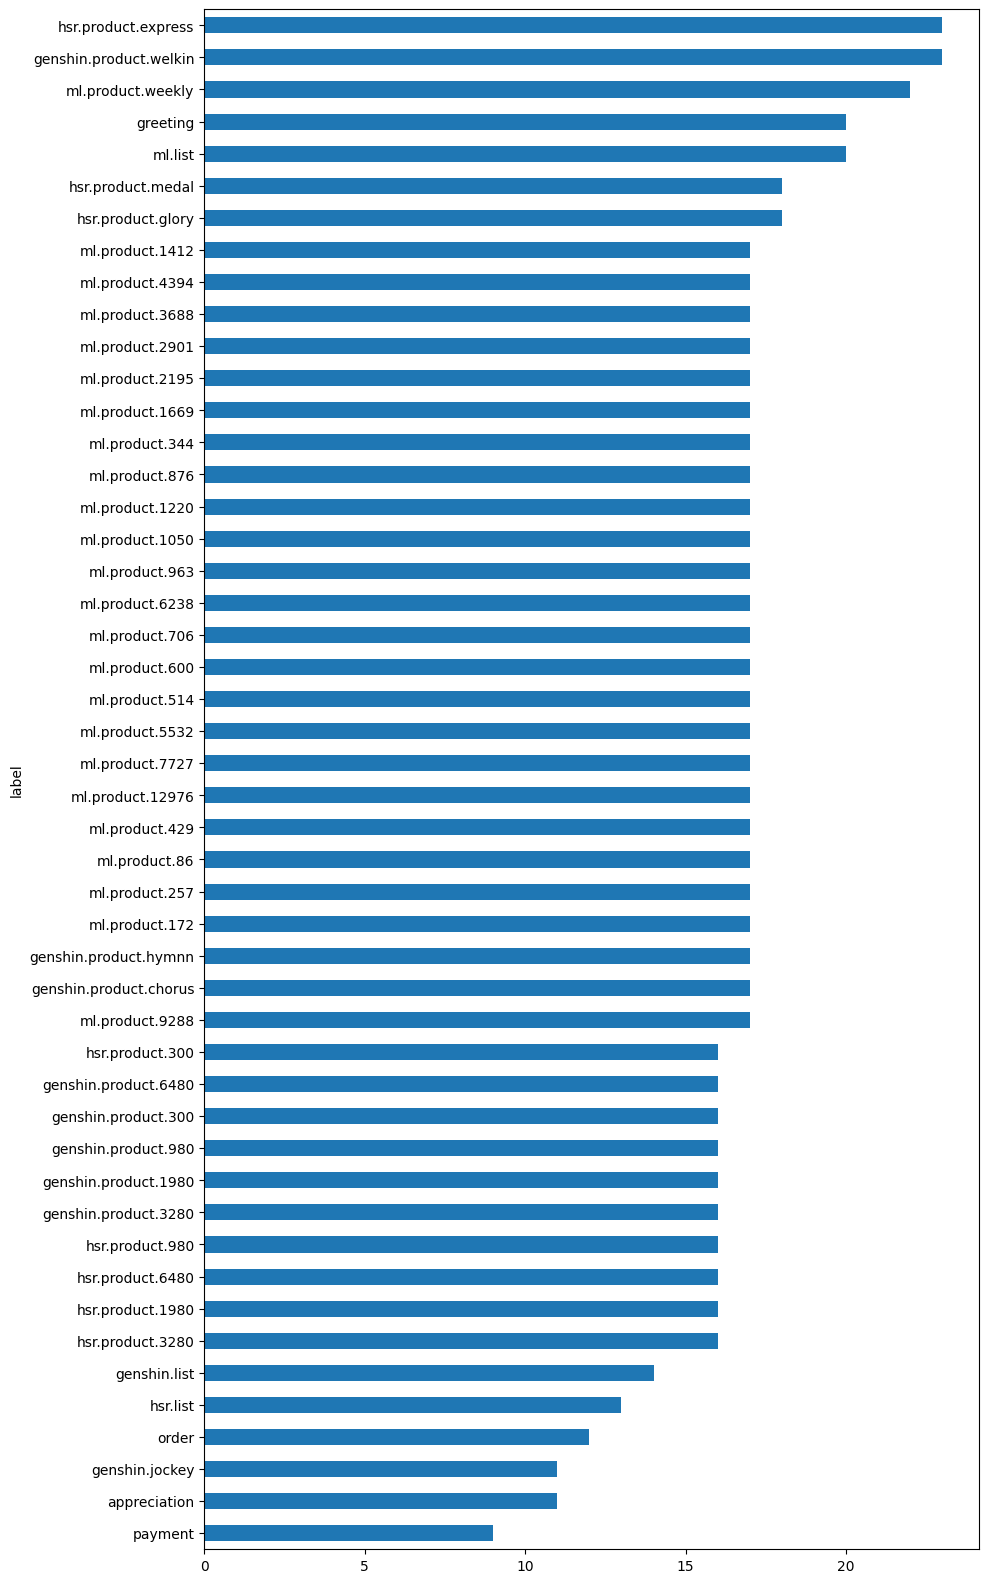

In [100]:
# import matplotlib.pyplot as plt
# fig , ax = plt.subplots(1,1)
# fig.set_size_inches(20,10)
# fig = df["tag"].value_counts().plot.barh(ax)

import matplotlib.pyplot as plt
fig , ax = plt.subplots(1,1)
fig.set_size_inches(10,20)
s = df["label"].value_counts()
s = s.sort_values()
fig = s.plot.barh(ax)
fig.figure.savefig('./assets/labels.png')


## Preprocess

### Manage Slang words

In [101]:
helper = Helper()
patterns = df.pattern.values
labels = df.label.values
removed_slangs = []
for text in patterns:
    removed_slangs.append(helper.slang_cleaning(text, slang_df))

removed_slangs

['hi',
 'hei',
 'halo',
 'selamat pagi',
 'selamat siang',
 'selamat sore',
 'halo admin mau tanya',
 'admin mau top up sudah buka belum',
 'sudah bisa topup admin ?',
 'halo kak',
 'kak , mau topup',
 'admin , mau topup ready kah ?',
 'hai admin',
 'ini dengan adeptushop ?',
 'permisi , ini benar dengan yang instagram nya adeptushop ?',
 'ini benar kontak nya adeptushop ?',
 'apa benar ini adeptushop ?',
 'yang adeptushop bukan ?',
 'ini yang toko topup bukan ?',
 'ini dengan adeptushop ya ?',
 'ini cara order nya bagaimana admin',
 'lewat uid atau apa ya ?',
 'lewat id atau apa ya ?',
 'pakai id admin ? ?',
 'via login apa uid bang ?',
 'meminta format order nya admin',
 'cara beli nya bagaimana ya ?',
 'jadi nya yang itu deh',
 'format nya bagaimana',
 'mau deh yang itu',
 'boleh deh yang itu',
 'mau beli admin , bagaimana format nya',
 'admin , transfer nya kemana ?',
 'transfer nya bagaimana ya bang',
 'bayar nya kemana ya ?',
 'bayar kemana bang',
 'lewat apa bayar nya ?',
 'bisa

### Remove Stopwords

In [102]:
removed_stopwords = []
for text in removed_slangs:
    removed_stopwords.append(helper.stopword_removal(text))

removed_stopwords

['hi',
 'hei',
 'halo',
 'selamat pagi',
 'selamat siang',
 'selamat sore',
 'halo admin',
 'admin top up buka',
 'topup admin?',
 'halo kak',
 'kak, topup',
 'admin, topup ready kah?',
 'hai admin',
 'adeptushop?',
 'permisi, instagram adeptushop?',
 'kontak adeptushop?',
 'adeptushop?',
 'adeptushop?',
 'toko topup?',
 'adeptushop?',
 'order admin',
 'uid?',
 'id?',
 'pakai id admin??',
 'login uid bang?',
 'format order admin',
 'beli?',
 'deh',
 'format',
 'deh',
 'deh',
 'beli admin, format',
 'admin, transfer kemana?',
 'transfer bang',
 'bayar kemana?',
 'bayar kemana bang',
 'bayar?',
 'qris enggak?',
 'kemana transfer?',
 'pakai mandiri?',
 'no transfer',
 'pricelist genshin impact?',
 'pricelist harga genshin impact kak',
 'listnya admin, genshin impact',
 'pricelist genshin impact',
 'pricelist genshin impact admin',
 'genshin impact pricelist',
 'genshin impact',
 'daftar harga genshin impact kak',
 'lihat harga genshinnya kak?',
 'daftar genshin impact',
 'daftar harga gen

In [103]:
removed_stopwords = []
for text in removed_slangs:
    removed_stopwords.append(helper.stopword_removal(text))

removed_stopwords

['hi',
 'hei',
 'halo',
 'selamat pagi',
 'selamat siang',
 'selamat sore',
 'halo admin',
 'admin top up buka',
 'topup admin?',
 'halo kak',
 'kak, topup',
 'admin, topup ready kah?',
 'hai admin',
 'adeptushop?',
 'permisi, instagram adeptushop?',
 'kontak adeptushop?',
 'adeptushop?',
 'adeptushop?',
 'toko topup?',
 'adeptushop?',
 'order admin',
 'uid?',
 'id?',
 'pakai id admin??',
 'login uid bang?',
 'format order admin',
 'beli?',
 'deh',
 'format',
 'deh',
 'deh',
 'beli admin, format',
 'admin, transfer kemana?',
 'transfer bang',
 'bayar kemana?',
 'bayar kemana bang',
 'bayar?',
 'qris enggak?',
 'kemana transfer?',
 'pakai mandiri?',
 'no transfer',
 'pricelist genshin impact?',
 'pricelist harga genshin impact kak',
 'listnya admin, genshin impact',
 'pricelist genshin impact',
 'pricelist genshin impact admin',
 'genshin impact pricelist',
 'genshin impact',
 'daftar harga genshin impact kak',
 'lihat harga genshinnya kak?',
 'daftar genshin impact',
 'daftar harga gen

### Tokenize + Lowercasing

In [104]:

tokenized_text = []
for text in removed_stopwords:
    tokenized_text.append(helper.tokenize(text))

tokenized_text

[['hi'],
 ['hei'],
 ['halo'],
 ['selamat', 'pagi'],
 ['selamat', 'siang'],
 ['selamat', 'sore'],
 ['halo', 'admin'],
 ['admin', 'top', 'up', 'buka'],
 ['topup', 'admin', '?'],
 ['halo', 'kak'],
 ['kak', ',', 'topup'],
 ['admin', ',', 'topup', 'ready', 'kah', '?'],
 ['hai', 'admin'],
 ['adeptushop', '?'],
 ['permisi', ',', 'instagram', 'adeptushop', '?'],
 ['kontak', 'adeptushop', '?'],
 ['adeptushop', '?'],
 ['adeptushop', '?'],
 ['toko', 'topup', '?'],
 ['adeptushop', '?'],
 ['order', 'admin'],
 ['uid', '?'],
 ['id', '?'],
 ['pakai', 'id', 'admin', '?', '?'],
 ['login', 'uid', 'bang', '?'],
 ['format', 'order', 'admin'],
 ['beli', '?'],
 ['deh'],
 ['format'],
 ['deh'],
 ['deh'],
 ['beli', 'admin', ',', 'format'],
 ['admin', ',', 'transfer', 'kemana', '?'],
 ['transfer', 'bang'],
 ['bayar', 'kemana', '?'],
 ['bayar', 'kemana', 'bang'],
 ['bayar', '?'],
 ['qris', 'enggak', '?'],
 ['kemana', 'transfer', '?'],
 ['pakai', 'mandiri', '?'],
 ['no', 'transfer'],
 ['pricelist', 'genshin', 'imp

### Filtering

In [105]:
clean_patterns = []
for text in tokenized_text:
    clean_patterns.append(helper.remove_punctuations(text))

clean_patterns

[['hi'],
 ['hei'],
 ['halo'],
 ['selamat', 'pagi'],
 ['selamat', 'siang'],
 ['selamat', 'sore'],
 ['halo', 'admin'],
 ['admin', 'top', 'up', 'buka'],
 ['topup', 'admin'],
 ['halo', 'kak'],
 ['kak', 'topup'],
 ['admin', 'topup', 'ready', 'kah'],
 ['hai', 'admin'],
 ['adeptushop'],
 ['permisi', 'instagram', 'adeptushop'],
 ['kontak', 'adeptushop'],
 ['adeptushop'],
 ['adeptushop'],
 ['toko', 'topup'],
 ['adeptushop'],
 ['order', 'admin'],
 ['uid'],
 ['id'],
 ['pakai', 'id', 'admin'],
 ['login', 'uid', 'bang'],
 ['format', 'order', 'admin'],
 ['beli'],
 ['deh'],
 ['format'],
 ['deh'],
 ['deh'],
 ['beli', 'admin', 'format'],
 ['admin', 'transfer', 'kemana'],
 ['transfer', 'bang'],
 ['bayar', 'kemana'],
 ['bayar', 'kemana', 'bang'],
 ['bayar'],
 ['qris', 'enggak'],
 ['kemana', 'transfer'],
 ['pakai', 'mandiri'],
 ['no', 'transfer'],
 ['pricelist', 'genshin', 'impact'],
 ['pricelist', 'harga', 'genshin', 'impact', 'kak'],
 ['listnya', 'admin', 'genshin', 'impact'],
 ['pricelist', 'genshin', 

### Convert to Train data

In [106]:
tokenizer = Tokenizer(num_words=200)
tokenizer.fit_on_texts(clean_patterns)
train = tokenizer.texts_to_sequences(clean_patterns)
train

[[89],
 [90],
 [77],
 [78, 74],
 [78, 91],
 [78, 92],
 [77, 2],
 [2, 64, 65, 93],
 [3, 2],
 [77, 13],
 [13, 3],
 [2, 3, 14, 94],
 [95, 2],
 [71],
 [8, 96, 71],
 [97, 71],
 [71],
 [71],
 [98, 3],
 [71],
 [79, 2],
 [84],
 [85],
 [86, 85, 2],
 [99, 84, 7],
 [80, 79, 2],
 [6],
 [31],
 [80],
 [31],
 [31],
 [6, 2, 80],
 [2, 75, 76],
 [75, 7],
 [81, 76],
 [81, 76, 7],
 [81],
 [100, 26],
 [76, 75],
 [86, 101],
 [102, 75],
 [28, 19, 20],
 [28, 12, 19, 20, 13],
 [82, 2, 19, 20],
 [28, 19, 20],
 [28, 19, 20, 2],
 [19, 20, 28],
 [19, 20],
 [59, 12, 19, 20, 13],
 [83, 12, 103, 13],
 [59, 19, 20],
 [59, 12, 19, 20, 2],
 [74, 66, 59, 12, 19, 20],
 [66, 28, 19, 20],
 [66, 59, 12, 19, 20],
 [12, 72, 19, 20],
 [72],
 [63],
 [72, 13],
 [62, 19, 20],
 [63],
 [62, 19, 20],
 [63],
 [62, 19, 20],
 [64, 65, 63],
 [64, 65, 62, 19, 20, 2],
 [2, 6, 63],
 [2, 6, 63],
 [2, 6, 62, 19, 20],
 [63, 15],
 [62, 19, 20, 15],
 [63, 14, 26],
 [62, 19, 20, 14, 26],
 [63, 2],
 [72, 2],
 [72, 7],
 [8, 3, 72],
 [8, 3, 63],
 [1

In [107]:
word_index = tokenizer.word_index
print('unique tokens: ' + str(len(word_index)))
# word_index

unique tokens: 114


In [108]:
f = open('assets/tokenizer.pickle', 'wb')
pickle.dump(tokenizer, f)
f.close()

In [109]:
# hyper params
max_len=20
output_dim=300

In [110]:
train = pad_sequences(train, maxlen=20)
train
# len(tags)

array([[ 0,  0,  0, ...,  0,  0, 89],
       [ 0,  0,  0, ...,  0,  0, 90],
       [ 0,  0,  0, ...,  0,  0, 77],
       ...,
       [ 0,  0,  0, ...,  0, 67, 68],
       [ 0,  0,  0, ...,  0, 67, 68],
       [ 0,  0,  0, ..., 67, 68,  2]], dtype=int32)

### Label Encoding

In [111]:
from sklearn.preprocessing import LabelEncoder
classes = []
kategori_list = pd.unique(df.label.values)
kategori_list = kategori_list.tolist()
for i in range(len(labels)):
    one_hot = np.zeros((len(kategori_list),), dtype=int)
    idx = kategori_list.index(labels[i])
    one_hot[idx] = 1
    classes.append(one_hot)
classes = np.array(classes)
encoder = LabelEncoder()
labels = encoder.fit_transform(kategori_list)
print(labels)
print(classes)
labels = dict()
for i in range(len(kategori_list)) :
    labels[i] = kategori_list[i]
print(labels)

f = open('assets/labels.pickle', 'wb')
pickle.dump(labels, f)
f.close()

[11 46 47  2 10  4  7  3  5  6  9  8  1 12 18 14 17 13 15 16 19 20 21 45
 41 27 29 31 33 35 37 39 42 44 22 23 25 26 28 30 32 34 36 38 40 43 24  0]
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
{0: 'greeting', 1: 'order', 2: 'payment', 3: 'genshin.list', 4: 'genshin.product.welkin', 5: 'genshin.product.300', 6: 'genshin.product.980', 7: 'genshin.product.1980', 8: 'genshin.product.3280', 9: 'genshin.product.6480', 10: 'genshin.product.hymnn', 11: 'genshin.product.chorus', 12: 'genshin.jockey', 13: 'hsr.list', 14: 'hsr.product.express', 15: 'hsr.product.300', 16: 'hsr.product.980', 17: 'hsr.product.1980', 18: 'hsr.product.3280', 19: 'hsr.product.6480', 20: 'hsr.product.glory', 21: 'hsr.product.medal', 22: 'ml.list', 23: 'ml.product.weekly', 24: 'ml.product.86', 25: 'ml.product.172', 26: 'ml.product.257', 27: 'ml.product.344', 28: 'ml.product.429', 29: 'ml.product.514', 30: 'ml.product.600', 31: 'ml.product.706', 32:

In [112]:
classes

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

### Embedding

In [113]:
# word2vec_path = '../assets/embedding.model'
word2vec_path = './embedding.model'
word2vec = models.KeyedVectors.load_word2vec_format(word2vec_path)
train_embedding_weights = np.zeros((len(word_index)+1, output_dim))
for word,index in word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(output_dim)
print(train_embedding_weights.shape)
print(train_embedding_weights)

(115, 300)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-1.11379552  0.34545547  0.37855235 ...  0.33840048  0.03952419
  -0.26274079]
 [-0.22985101  1.03898168 -0.68412149 ... -0.22738473 -0.4897697
  -0.42474639]
 ...
 [ 0.17207344 -0.60071194  0.38117182 ...  1.20076692  0.99574929
  -1.37965918]
 [-1.49075294 -0.88580853 -0.32997268 ...  0.07275587 -0.83592081
   0.07218871]
 [-1.94963896  1.46668911 -1.96883345 ...  1.74579477 -1.44915092
  -1.02211905]]


### Create Model

In [114]:
from sklearn.model_selection import train_test_split
num_words = len(word_index)+1

X_train, X_test, y_train, y_test = train_test_split(train, classes, test_size=0.2, random_state=42)
# X_train = np.array(X_train)
# X_test = np.array(X_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)
# Define the model

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, 
                              output_dim,
                              weights=[train_embedding_weights],
                              input_length=max_len),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(labels), activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])
# sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
# model
# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])

model.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_53 (Embedding)    (None, 20, 300)           34500     
                                                                 
 lstm_38 (LSTM)              (None, 128)               219648    
                                                                 
 dropout_106 (Dropout)       (None, 128)               0         
                                                                 
 dense_106 (Dense)           (None, 64)                8256      
                                                                 
 dropout_107 (Dropout)       (None, 64)                0         
                                                                 
 dense_107 (Dense)           (None, 48)                3120      
                                                                 
Total params: 265524 (1.01 MB)
Trainable params: 2655

In [115]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=20)
# model_save = ModelCheckpoint('model_lstm.hdf5', save_best_only= True, verbose=0)
batch_size = 32
num_epochs = 150
hist = model.fit(
    X_train,
    y_train, 
    epochs=num_epochs,  
    shuffle=True,
    validation_data=(X_test, y_test),
    batch_size=batch_size
    )
model.save("chatbot_model.h5")
test_loss, test_acc = model.evaluate(X_test, y_test)

# model.save("chatbot_model_py")
# callbacks=[model_save]
# tf.saved_model.save(model, "chatbot")



Epoch 1/150
20/20 [==============================] - 6s 111ms/step - loss: 3.8714 - acc: 0.0344 - val_loss: 3.7988 - val_acc: 0.0562
Epoch 2/150
20/20 [==============================] - 1s 43ms/step - loss: 3.6678 - acc: 0.0970 - val_loss: 3.6440 - val_acc: 0.1125
Epoch 3/150
20/20 [==============================] - 0s 25ms/step - loss: 3.5127 - acc: 0.1252 - val_loss: 3.4180 - val_acc: 0.1813
Epoch 4/150
20/20 [==============================] - 0s 24ms/step - loss: 3.2102 - acc: 0.1878 - val_loss: 3.1398 - val_acc: 0.2125
Epoch 5/150
20/20 [==============================] - 1s 27ms/step - loss: 2.9546 - acc: 0.2300 - val_loss: 2.8132 - val_acc: 0.2937
Epoch 6/150
20/20 [==============================] - 0s 17ms/step - loss: 2.6948 - acc: 0.2676 - val_loss: 2.4595 - val_acc: 0.5063
Epoch 7/150
20/20 [==============================] - 0s 20ms/step - loss: 2.3633 - acc: 0.3615 - val_loss: 2.0960 - val_acc: 0.6062
Epoch 8/150
20/20 [==============================] - 0s 17ms/step - loss: 2

/home/ihsan/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [116]:
from sklearn.metrics import f1_score,confusion_matrix, recall_score, precision_score
y_pred = model.predict(X_test)
y_pred_cls = y_pred.argmax(axis=1)

y_test_cls = y_test.argmax(axis=1)
f1 = f1_score(y_test_cls, y_pred_cls, average='weighted')
recall = recall_score(y_test_cls, y_pred_cls,average='weighted',zero_division=0)
precision = precision_score(y_test_cls, y_pred_cls,average='weighted')
print("Accuracy:", test_acc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Loss: ", test_loss) 


5/5 [==============================] - 0s 7ms/step
Accuracy: 0.9437500238418579
Precision:  0.97109375
Recall:  0.94375
F1 Score:  0.9469584235209234
Loss:  0.41492804884910583


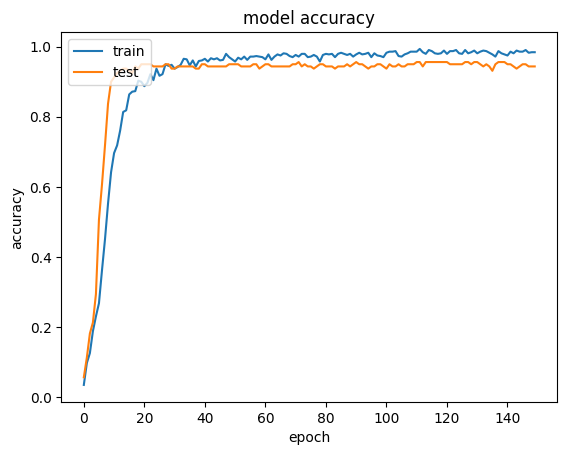

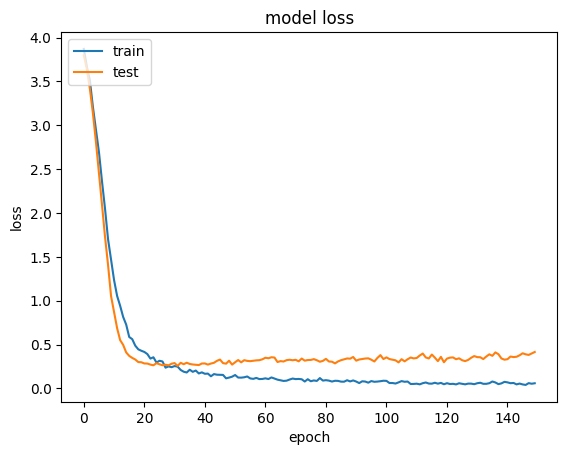

In [117]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Compare to GRU

In [118]:
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, 
                              output_dim,
                              weights=[train_embedding_weights],
                              input_length=max_len),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(labels), activation='softmax')
])

model_gru.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])

model_gru.summary()


Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_54 (Embedding)    (None, 20, 300)           34500     
                                                                 
 gru_15 (GRU)                (None, 128)               165120    
                                                                 
 dropout_108 (Dropout)       (None, 128)               0         
                                                                 
 dense_108 (Dense)           (None, 64)                8256      
                                                                 
 dropout_109 (Dropout)       (None, 64)                0         
                                                                 
 dense_109 (Dense)           (None, 48)                3120      
                                                                 
Total params: 210996 (824.20 KB)
Trainable params: 21

In [119]:
hist = model_gru.fit(
    X_train,
    y_train, 
    epochs=num_epochs,  
    shuffle=True,
    validation_data=(X_test, y_test),
    batch_size=batch_size
    )
test_loss, test_acc = model_gru.evaluate(X_test, y_test)

Epoch 1/150
20/20 [==============================] - 4s 90ms/step - loss: 3.9052 - acc: 0.0376 - val_loss: 3.7256 - val_acc: 0.1063
Epoch 2/150
20/20 [==============================] - 1s 30ms/step - loss: 3.6694 - acc: 0.0814 - val_loss: 3.5749 - val_acc: 0.1688
Epoch 3/150
20/20 [==============================] - 1s 26ms/step - loss: 3.4173 - acc: 0.1596 - val_loss: 3.3419 - val_acc: 0.1875
Epoch 4/150
20/20 [==============================] - 0s 20ms/step - loss: 3.2307 - acc: 0.1690 - val_loss: 3.0984 - val_acc: 0.2375
Epoch 5/150
20/20 [==============================] - 0s 19ms/step - loss: 2.9554 - acc: 0.2363 - val_loss: 2.8696 - val_acc: 0.3250
Epoch 6/150
20/20 [==============================] - 0s 15ms/step - loss: 2.6881 - acc: 0.2989 - val_loss: 2.5732 - val_acc: 0.4563
Epoch 7/150
20/20 [==============================] - 0s 20ms/step - loss: 2.4302 - acc: 0.3693 - val_loss: 2.2889 - val_acc: 0.6000
Epoch 8/150
20/20 [==============================] - 0s 15ms/step - loss: 2.

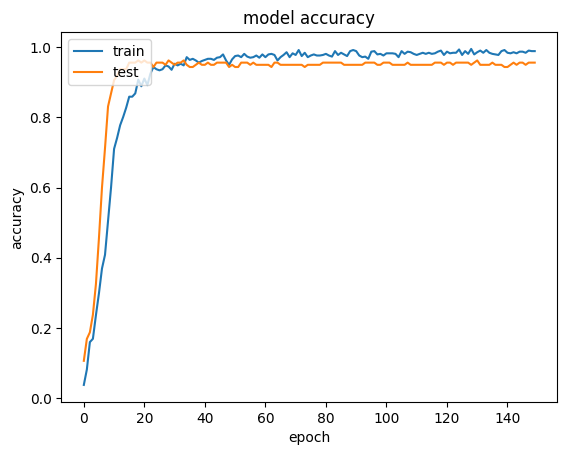

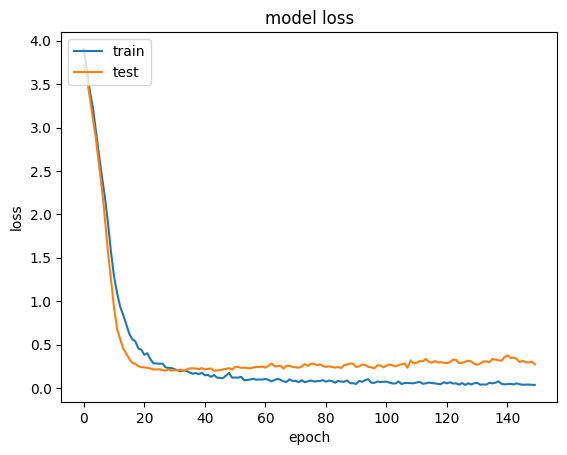

In [120]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [121]:
y_pred = model_gru.predict(X_test)
y_pred_cls = y_pred.argmax(axis=1)

# Convert y_test from one-hot encoding to class labels if necessary
y_test_cls = y_test.argmax(axis=1)

f1 = f1_score(y_test_cls, y_pred_cls, average='weighted')
recall = recall_score(y_test_cls, y_pred_cls,average='weighted',zero_division=0)
precision = precision_score(y_test_cls, y_pred_cls,average='weighted')
print("Accuracy:", test_acc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Loss: ", test_loss)

5/5 [==============================] - 0s 9ms/step
Accuracy: 0.956250011920929
Precision:  0.9713541666666666
Recall:  0.95625
F1 Score:  0.9567311507936509
Loss:  0.2735822796821594


### BiLSTM

In [122]:
model_bilstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, 
                              output_dim,
                              weights=[train_embedding_weights],
                              input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(labels), activation='softmax')
])
# sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model_bilstm.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])

model_bilstm.summary()

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_55 (Embedding)    (None, 20, 300)           34500     
                                                                 
 bidirectional_15 (Bidirect  (None, 256)               439296    
 ional)                                                          
                                                                 
 dropout_110 (Dropout)       (None, 256)               0         
                                                                 
 dense_110 (Dense)           (None, 64)                16448     
                                                                 
 dropout_111 (Dropout)       (None, 64)                0         
                                                                 
 dense_111 (Dense)           (None, 48)                3120      
                                                     

In [123]:
hist = model_bilstm.fit(
    X_train,
    y_train, 
    epochs=num_epochs,  
    shuffle=True,
    validation_data=(X_test, y_test),
    batch_size=batch_size
    )
test_loss, test_acc = model_bilstm.evaluate(X_test, y_test)

Epoch 1/150
20/20 [==============================] - 6s 109ms/step - loss: 3.8489 - acc: 0.0376 - val_loss: 3.7611 - val_acc: 0.1250
Epoch 2/150
20/20 [==============================] - 1s 47ms/step - loss: 3.6907 - acc: 0.1095 - val_loss: 3.5822 - val_acc: 0.1813
Epoch 3/150
20/20 [==============================] - 1s 30ms/step - loss: 3.3967 - acc: 0.1768 - val_loss: 3.2374 - val_acc: 0.1875
Epoch 4/150
20/20 [==============================] - 1s 26ms/step - loss: 3.0464 - acc: 0.2269 - val_loss: 2.8187 - val_acc: 0.2688
Epoch 5/150
20/20 [==============================] - 1s 27ms/step - loss: 2.7920 - acc: 0.2739 - val_loss: 2.5210 - val_acc: 0.3562
Epoch 6/150
20/20 [==============================] - 1s 26ms/step - loss: 2.4941 - acc: 0.3192 - val_loss: 2.2935 - val_acc: 0.4688
Epoch 7/150
20/20 [==============================] - 0s 22ms/step - loss: 2.1666 - acc: 0.4006 - val_loss: 1.9589 - val_acc: 0.6062
Epoch 8/150
20/20 [==============================] - 0s 23ms/step - loss: 1

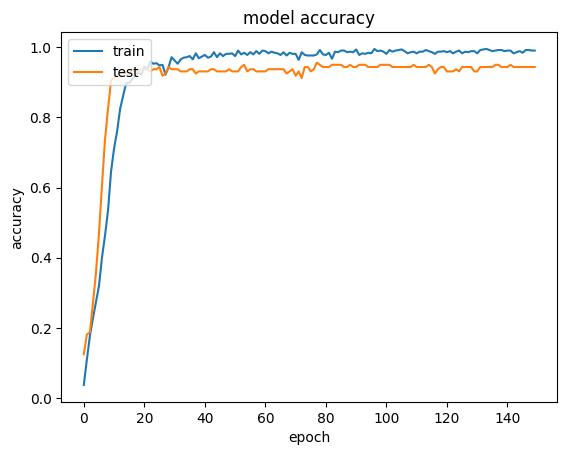

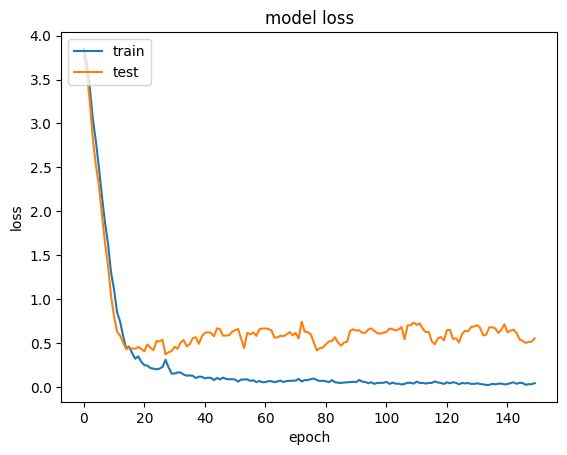

In [124]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [125]:
y_pred = model_bilstm.predict(X_test)
y_pred_cls = y_pred.argmax(axis=1)

# Convert y_test from one-hot encoding to class labels if necessary
y_test_cls = y_test.argmax(axis=1)
# matrix = confusion_matrix(y_test_cls, y_pred_cls)
# print("Matrix ", matrix)
# Calculate F1 score
f1 = f1_score(y_test_cls, y_pred_cls, average='weighted')
recall = recall_score(y_test_cls, y_pred_cls,average='weighted',zero_division=0)
precision = precision_score(y_test_cls, y_pred_cls,average='weighted')
print("Accuracy:", test_acc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Loss: ", test_loss)

5/5 [==============================] - 1s 8ms/step
Accuracy: 0.9437500238418579
Precision:  0.9548214285714286
Recall:  0.94375
F1 Score:  0.9419728535353535
Loss:  0.5529192090034485


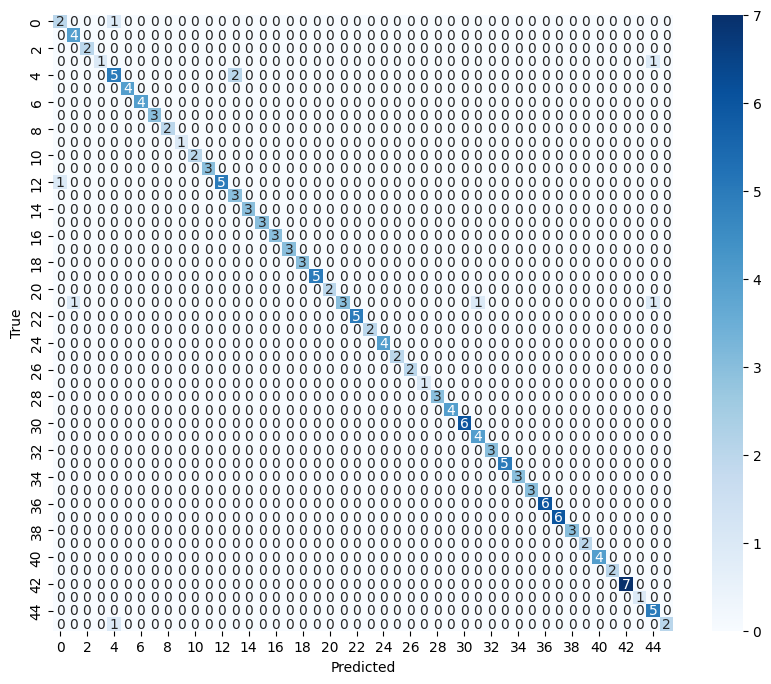

In [126]:

import seaborn as sns
conf_matrix = confusion_matrix(y_test_cls, y_pred_cls)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Cross Validation

In [127]:
from sklearn.model_selection import KFold
num_splits = 4
kfold = KFold(n_splits=num_splits, shuffle=True, random_state=42)
acc = []
loss = []
precisions = []
recalls = []
f1_scores = []
X = np.array(train)
y = classes
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(num_words, 
                                output_dim,
                                weights=[train_embedding_weights],
                                input_length=max_len),
        tf.keras.layers.LSTM(128),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(labels), activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])
    model.fit(
        X_train,
        y_train, 
        epochs=num_epochs,  
        verbose=0
    )
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print("acc: %.2f%%" % (test_acc*100))
    print("loss: %.2f%%" % (test_loss*100))
   
    y_pred = model.predict(X_test)
    y_pred_cls = y_pred.argmax(axis=1)
    y_test_cls = y_test.argmax(axis=1)
   
    f1 = f1_score(y_test_cls, y_pred_cls, average='weighted', zero_division=0)
    recall = recall_score(y_test_cls, y_pred_cls,average='weighted',zero_division=0)
    precision = precision_score(y_test_cls, y_pred_cls,average='weighted',zero_division=0)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)
    precisions.append(precision * 100)
    recalls.append(recall * 100)
    f1_scores.append(f1 * 100)
    loss.append(test_loss * 100)
    acc.append(test_acc * 100)

print("avg loss = %.2f%% (+/- %.2f%%)" % (np.mean(loss), np.std(loss)))
print("avg acc = %.2f%% (+/- %.2f%%)" % (np.mean(acc), np.std(acc)))
print("avg recall = %.2f%% (+/- %.2f%%)" % (np.mean(recalls), np.std(recalls)))
print("avg precision = %.2f%% (+/- %.2f%%)" % (np.mean(precisions), np.std(precisions)))
print("avg f1_score = %.2f%% (+/- %.2f%%)" % (np.mean(f1_scores), np.std(f1_scores)))

acc: 94.50%
loss: 24.81%
7/7 [==============================] - 1s 23ms/step
Precision:  0.9603869047619047
Recall:  0.945
F1 Score:  0.944571449792038
acc: 99.00%
loss: 6.89%
7/7 [==============================] - 0s 7ms/step
Precision:  0.9915555555555556
Recall:  0.99
F1 Score:  0.99
acc: 98.50%
loss: 4.04%
7/7 [==============================] - 3s 344ms/step
Precision:  0.9923809523809524
Recall:  0.985
F1 Score:  0.9865811965811966


: 

### Cross Val BiLSTM

In [ ]:

kfold = KFold(n_splits=num_splits, shuffle=True, random_state=42)
acc = []
loss = []
precisions = []
recalls = []
f1_scores = []
X = np.array(train)
y = classes
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(num_words, 
                                output_dim,
                                weights=[train_embedding_weights],
                                input_length=max_len),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(labels), activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])
    model.fit(
        X_train,
        y_train, 
        epochs=num_epochs,  
        verbose=0
    )
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print("acc: %.2f%%" % (test_acc*100))
    print("loss: %.2f%%" % (test_loss*100))

    y_pred = model.predict(X_test)
    y_pred_cls = y_pred.argmax(axis=1)
    y_test_cls = y_test.argmax(axis=1)
   
    f1 = f1_score(y_test_cls, y_pred_cls, average='weighted', zero_division=0)
    recall = recall_score(y_test_cls, y_pred_cls,average='weighted',zero_division=0)
    precision = precision_score(y_test_cls, y_pred_cls,average='weighted',zero_division=0)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)
    precisions.append(precision * 100)
    recalls.append(recall * 100)
    f1_scores.append(f1 * 100)
    loss.append(test_loss * 100)
    acc.append(test_acc * 100)

print("avg loss = %.2f%% (+/- %.2f%%)" % (np.mean(loss), np.std(loss)))
print("avg acc = %.2f%% (+/- %.2f%%)" % (np.mean(acc), np.std(acc)))
print("avg recall = %.2f%% (+/- %.2f%%)" % (np.mean(recalls), np.std(recalls)))
print("avg precision = %.2f%% (+/- %.2f%%)" % (np.mean(precisions), np.std(precisions)))
print("avg f1_score = %.2f%% (+/- %.2f%%)" % (np.mean(f1_scores), np.std(f1_scores)))

acc: 95.00%
loss: 53.34%
7/7 [==============================] - 1s 8ms/step
Precision:  0.9676190476190476
Recall:  0.95
F1 Score:  0.9511111111111111
acc: 98.50%
loss: 9.80%
7/7 [==============================] - 1s 12ms/step
Precision:  0.9875198412698413
Recall:  0.985
F1 Score:  0.9850793650793651
acc: 98.00%
loss: 14.64%
7/7 [==============================] - 1s 14ms/step
Precision:  0.9883333333333334
Recall:  0.98
F1 Score:  0.9808888888888887
acc: 98.49%
loss: 18.73%
7/7 [==============================] - 1s 14ms/step
Precision:  0.9867671691792295
Recall:  0.9849246231155779
F1 Score:  0.9847974588519419
avg loss = 24.12% (+/- 17.16%)
avg acc = 97.50% (+/- 1.46%)
avg recall = 97.50% (+/- 1.46%)
avg precision = 98.26% (+/- 0.86%)
avg f1_score = 97.55% (+/- 1.42%)


### Cross Val GRU

In [ ]:

kfold = KFold(n_splits=num_splits, shuffle=True, random_state=42)
acc = []
loss = []
precisions = []
recalls = []
f1_scores = []
X = np.array(train)
y = classes
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(num_words, 
                                output_dim,
                                weights=[train_embedding_weights],
                                input_length=max_len),
        tf.keras.layers.GRU(128),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(labels), activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])
    model.fit(
        X_train,
        y_train, 
        epochs=num_epochs,  
        verbose=0
    )
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print("acc: %.2f%%" % (test_acc*100))
    print("loss: %.2f%%" % (test_loss*100))
    y_pred = model.predict(X_test)
    y_pred_cls = y_pred.argmax(axis=1)
    y_test_cls = y_test.argmax(axis=1)
   
    f1 = f1_score(y_test_cls, y_pred_cls, average='weighted', zero_division=0)
    recall = recall_score(y_test_cls, y_pred_cls,average='weighted',zero_division=0)
    precision = precision_score(y_test_cls, y_pred_cls,average='weighted',zero_division=0)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1)
    precisions.append(precision * 100)
    recalls.append(recall * 100)
    f1_scores.append(f1 * 100)
    loss.append(test_loss * 100)
    acc.append(test_acc * 100)

print("avg loss = %.2f%% (+/- %.2f%%)" % (np.mean(loss), np.std(loss)))
print("avg acc = %.2f%% (+/- %.2f%%)" % (np.mean(acc), np.std(acc)))
print("avg recall = %.2f%% (+/- %.2f%%)" % (np.mean(recalls), np.std(recalls)))
print("avg precision = %.2f%% (+/- %.2f%%)" % (np.mean(precisions), np.std(precisions)))
print("avg f1_score = %.2f%% (+/- %.2f%%)" % (np.mean(f1_scores), np.std(f1_scores)))

acc: 96.00%
loss: 37.93%
7/7 [==============================] - 1s 10ms/step
Precision:  0.97275
Recall:  0.96
F1 Score:  0.9603857947607947
acc: 98.50%
loss: 8.93%
7/7 [==============================] - 1s 8ms/step
Precision:  0.9875198412698413
Recall:  0.985
F1 Score:  0.9850793650793651
acc: 98.00%
loss: 7.67%
7/7 [==============================] - 0s 7ms/step
Precision:  0.9854545454545455
Recall:  0.98
F1 Score:  0.9807012987012987
acc: 98.49%
loss: 16.26%
7/7 [==============================] - 0s 6ms/step
Precision:  0.9899497487437185
Recall:  0.9849246231155779
F1 Score:  0.9852339849166085
avg loss = 17.70% (+/- 12.13%)
avg acc = 97.75% (+/- 1.03%)
avg recall = 97.75% (+/- 1.03%)
avg precision = 98.39% (+/- 0.66%)
avg f1_score = 97.79% (+/- 1.02%)
